## <b>KGLiDS APIs</b>

In [1]:
from api.api import KGLiDS
import pandas as pd
kglids = KGLiDS(endpoint='http://localhost:7200', db='kaggle_demo')

In [2]:
kglids.show_graph_info()

Information captured: 


,Datasets,Pipelines,Tables,Columns
0,104,1064,425,13719


<hr>

<b> Running Adhoc-queries on our graph!</b><br><br> 
<b>1.  Customized queries </b>

In [3]:
query = """ 
SELECT ?source {
?source_id rdf:type    kglids:Source    ;
           schema:name ?source          . } """
kglids.query(query)

,source
0,kaggle_demo


<hr>

<b>Not comfortable with Sparql? No worries!</b><br> 
<b> You can use pre-defined KGLiDS APIs to discover useful insights that remain locked inside your Data</b>

Note: 
- All query result(s) are returned in a form of <code>pandas.DataFrame</code> or plots in some cases 
- KGLiDS is a transparent system, you can see the queries used by the system by setting <code>show_query = True</code> in case of every API you wish to use.

<b>2.  Retrieving dataset(s) </b>

In [4]:
kglids.get_datasets_info()

,Dataset,Number_of_tables
0,COVID-19 Corona Virus India Dataset,8
1,COVID-19 Dataset,6
2,COVID-19 Healthy Diet Dataset,5
3,COVID-19 Indonesia Dataset,1
4,COVID-19 World Vaccination Progress,2
...,...,...
99,uciml.red-wine-quality-cortez-et-al-2009,20
100,unitednations.international-greenhouse-gas-emi...,4
101,upadorprofzs.testes,8
102,vitaliymalcev.russian-passenger-air-service-20...,14


<b>3.  Retrieving table(s) </b>

In [5]:
kglids.get_tables_info()

Showing all available table(s): 


,Table,Dataset,Path_to_table
0,tests_day_wise.csv,COVID-19 Corona Virus India Dataset,/data/mossad/kglids/storage/data_sources/kaggl...
1,state_level_latest.csv,COVID-19 Corona Virus India Dataset,/data/mossad/kglids/storage/data_sources/kaggl...
2,state_level_daily.csv,COVID-19 Corona Virus India Dataset,/data/mossad/kglids/storage/data_sources/kaggl...
3,complete.csv,COVID-19 Corona Virus India Dataset,/data/mossad/kglids/storage/data_sources/kaggl...
4,tests_state_wise.csv,COVID-19 Corona Virus India Dataset,/data/mossad/kglids/storage/data_sources/kaggl...
...,...,...,...
420,product.csv,ylchang.coffee-shop-sample-data-1113,/data/mossad/kglids/storage/data_sources/kaggl...
421,Dates.csv,ylchang.coffee-shop-sample-data-1113,/data/mossad/kglids/storage/data_sources/kaggl...
422,201904 sales reciepts.csv,ylchang.coffee-shop-sample-data-1113,/data/mossad/kglids/storage/data_sources/kaggl...
423,customer.csv,ylchang.coffee-shop-sample-data-1113,/data/mossad/kglids/storage/data_sources/kaggl...


In [6]:
kglids.get_tables_info(dataset='UK COVID-19 Data')


Showing table(s) for 'UK COVID-19 Data' dataset: 


,Table,Dataset,Path_to_table
0,UK_Local_Authority_UTLA_COVID_Dataset.csv,UK COVID-19 Data,/data/mossad/kglids/storage/data_sources/kaggl...
1,UK_National_Total_COVID_Dataset.csv,UK COVID-19 Data,/data/mossad/kglids/storage/data_sources/kaggl...
2,NEW_Official_Population_Data_ONS_mid-2019.csv,UK COVID-19 Data,/data/mossad/kglids/storage/data_sources/kaggl...
3,UK_Devolved_Nations_COVID_Dataset.csv,UK COVID-19 Data,/data/mossad/kglids/storage/data_sources/kaggl...
4,England_Regions_COVID_Dataset.csv,UK COVID-19 Data,/data/mossad/kglids/storage/data_sources/kaggl...
5,Populations_for_UK_and_Devolved_Nations.csv,UK COVID-19 Data,/data/mossad/kglids/storage/data_sources/kaggl...


<b>Discovering enrichment possibilities using KGLiDS's recommendations </b><br><br>
<b>4. Recommending tables by column name search</b>

In [7]:
df = kglids.search_tables_on(conditions=[['player', 'club']])
df

Showing recommendations as per the following conditions:
Condition =  [['player', 'club']]


,Dataset,Table,Number_of_columns,Number_of_rows,Path_to_table
0,FIFA 21 complete player dataset,players_21.csv,106,18944,/data/mossad/kglids/storage/data_sources/kaggl...
1,FIFA 21 complete player dataset,players_20.csv,106,18483,/data/mossad/kglids/storage/data_sources/kaggl...
2,FIFA 20 complete player dataset,players_20.csv,104,18278,/data/mossad/kglids/storage/data_sources/kaggl...
3,FIFA 21 complete player dataset,players_19.csv,106,18085,/data/mossad/kglids/storage/data_sources/kaggl...
4,FIFA 21 complete player dataset,players_18.csv,106,17954,/data/mossad/kglids/storage/data_sources/kaggl...
5,FIFA22 OFFICIAL DATASET,FIFA19_official_data.csv,64,17943,/data/mossad/kglids/storage/data_sources/kaggl...
6,FIFA22 OFFICIAL DATASET,FIFA18_official_data.csv,64,17927,/data/mossad/kglids/storage/data_sources/kaggl...
7,FIFA 20 complete player dataset,players_19.csv,104,17770,/data/mossad/kglids/storage/data_sources/kaggl...
8,FIFA 21 complete player dataset,players_17.csv,106,17597,/data/mossad/kglids/storage/data_sources/kaggl...
9,FIFA 20 complete player dataset,players_18.csv,104,17592,/data/mossad/kglids/storage/data_sources/kaggl...


 <b>5. Recommending unionable tables</b>

In [8]:
recommendations_union = kglids.recommend_k_unionable_tables(df.iloc[19], k = 5)
recommendations_union

Showing the top-5 unionable table recommendations:


,Dataset,Recommended_table,Score,Path_to_table
0,open-source-sports.mens-professional-basketball,basketball_player_allstar.csv,1.00,/data/mossad/kglids/storage/data_sources/kaggl...
1,open-source-sports.mens-professional-basketball,basketball_awards_players.csv,0.92,/data/mossad/kglids/storage/data_sources/kaggl...
2,open-source-sports.mens-professional-basketball,basketball_teams.csv,0.92,/data/mossad/kglids/storage/data_sources/kaggl...
3,open-source-sports.mens-professional-basketball,basketball_coaches.csv,0.92,/data/mossad/kglids/storage/data_sources/kaggl...
4,open-source-sports.mens-professional-basketball,basketball_master.csv,0.67,/data/mossad/kglids/storage/data_sources/kaggl...


<b>6. Recommending joinable tables</b>

In [9]:
recommendations_join = kglids.recommend_k_joinable_tables(df.iloc[19], k = 5)
recommendations_join

Showing the top-5 joinable table recommendations:


,Dataset,Recommended_table,Score,Path_to_table
0,proselotis.financial-ipo-data,IPODataFull.csv,1.00,/data/mossad/kglids/storage/data_sources/kaggl...
1,rajanand.key-indicators-of-annual-health-survey,Key_indicator_statewise.csv,0.13,/data/mossad/kglids/storage/data_sources/kaggl...
2,open-source-sports.mens-professional-basketball,basketball_teams.csv,0.08,/data/mossad/kglids/storage/data_sources/kaggl...
3,open-source-sports.mens-professional-basketball,basketball_series_post.csv,0.08,/data/mossad/kglids/storage/data_sources/kaggl...
4,mdabbert.ultimate-ufc-dataset,upcoming-event.csv,0.07,/data/mossad/kglids/storage/data_sources/kaggl...


<b>7. Visualizing the path between two joinable tables</b>

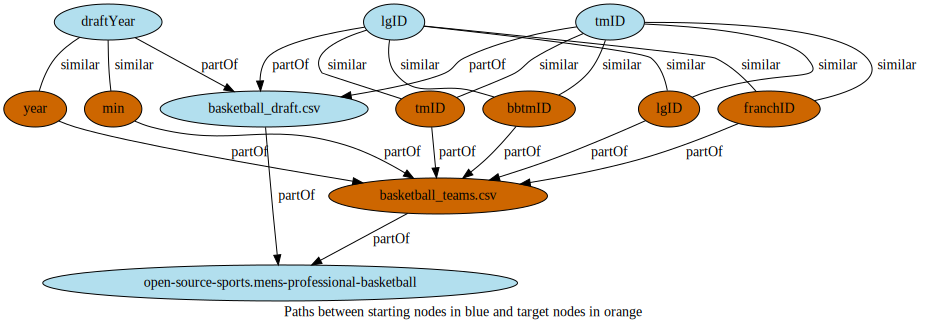

In [10]:
kglids.get_path_between_tables(df.iloc[19], recommendations_join.iloc[2], hops=1)

In [11]:
# df1 = pd.read_csv(df.iloc[19].Path_to_table)
# df1

In [12]:
# df2 = pd.read_csv(recommendations_join.iloc[2].Path_to_table)
# df2

In [13]:
# result_join = df1.merge(df2, left_on='tmID', right_on='tmID')
# result_join

<b>8. Search pipelines</b> 

In [14]:
kglids.get_pipelines_info()

,Pipeline,Dataset,Author,Written_on,Number_of_votes,Score
0,How Models Work,iabhishekofficial.mobile-price-classification,DanB,2023-04-21 13:39:23,5315,0.877727
1,Your First Machine Learning Model,iabhishekofficial.mobile-price-classification,DanB,2023-04-21 13:38:55,2932,0.866003
2,Model Validation,iabhishekofficial.mobile-price-classification,DanB,2023-04-21 13:38:50,2662,0.831276
3,Machine Learning Tutorial for Beginners,uciml.biomechanical-features-of-orthopedic-pat...,DATAI,2018-07-24 14:43:45,2532,0.754959
4,Underfitting and Overfitting,iabhishekofficial.mobile-price-classification,DanB,2023-04-21 13:38:58,2503,0.604260
...,...,...,...,...,...,...
1059,From ZZZs to Insights,mlomuscio.sleepstudypilot,Francis S. Domingo,2023-12-02 04:07:49,0,0.524537
1060,Starter: SleepStudyPilot 10e5fcfb-e,mlomuscio.sleepstudypilot,Kaggle Kerneler,2019-09-05 18:57:59,0,0.661398
1061,JL COVID EDA PROJECT 1,anandhuh.covid19-india-statewise-vaccine-data,Yash Khandagale,2023-07-21 20:34:18,0,0.548864
1062,Cleaning,supergus.multistage-continuousflow-manufacturi...,Pedro Yves Fracari,2021-06-03 03:27:32,0,0.610697


In [15]:
kglids.get_pipelines_info(author='DanB')

,Pipeline,Dataset,Author,Written_on,Number_of_votes,Score
0,How Models Work,iabhishekofficial.mobile-price-classification,DanB,2023-04-21 13:39:23,5315,0.877727
1,Your First Machine Learning Model,iabhishekofficial.mobile-price-classification,DanB,2023-04-21 13:38:55,2932,0.866003
2,Model Validation,iabhishekofficial.mobile-price-classification,DanB,2023-04-21 13:38:50,2662,0.831276
3,Underfitting and Overfitting,iabhishekofficial.mobile-price-classification,DanB,2023-04-21 13:38:58,2503,0.604260
4,Random Forests,iabhishekofficial.mobile-price-classification,DanB,2023-04-21 13:39:22,1723,0.641919
5,Basic Data Exploration,iabhishekofficial.mobile-price-classification,DanB,2023-04-21 13:38:55,1555,0.567306
6,Explore Your Data,dansbecker.home-data-for-ml-course,DanB,2019-01-23 01:07:33,1337,0.899627
7,Basic Data Exploration Daily,iabhishekofficial.mobile-price-classification,DanB,2019-08-24 02:41:50,95,0.811601
8,Exercise: Explore Your Data,dansbecker.home-data-for-ml-course,DanB,2019-01-23 01:07:42,21,0.749186


<b>9. Most recent pipeline</b> 

In [16]:
kglids.get_most_recent_pipeline()

,Pipeline,Dataset,Author,Written_on,Number_of_votes,Score
0,Pharma Sales Exploratory Data Analysis 💊,milanzdravkovic.pharma-sales-data,Aila Felix,2023-12-10 21:02:03,9,0.804345


In [17]:
kglids.get_most_recent_pipeline(dataset='fedesoriano.hepatitis-c-dataset')

,Pipeline,Dataset,Author,Written_on,Number_of_votes,Score
0,Hepatitis Prediction MKR,fedesoriano.hepatitis-c-dataset,Igor Gutsu,2023-12-08 17:09:35,2,0.66338


<b>10.<i> Top-k</i> scoring pipelines</b> 

In [18]:
kglids.get_top_k_scoring_pipelines_for_dataset(k=5)

,Pipeline,Dataset,Author,Written_on,Number_of_votes,Score
0,Most powerful Superheroes & Best Comic ?,claudiodavi.superhero-set,Debadri Dutta,2018-10-10 07:55:48,57,0.999687
1,Red Wine 🍷 Quality Assesment 📊 | Starter Pack,uciml.red-wine-quality-cortez-et-al-2009,Aditi Mulye,2021-11-15 00:02:22,65,0.998915
2,Storesalesforecast_3 diff models,rohitsahoo.sales-forecasting,Alkan Erturan,2023-10-24 16:15:59,13,0.998100
3,Who said this line[EDA/Classification/Keras/ANN],thec03u5.seinfeld-chronicles,Nafisur Rahman,2018-07-27 04:35:13,4,0.997422
4,Space Missions Simple EDA and Visualizations,agirlcoding.all-space-missions-from-1957,Rupesh Deshmukh,2020-09-13 05:46:06,27,0.997159


In [19]:
kglids.get_top_k_scoring_pipelines_for_dataset(dataset='fedesoriano.hepatitis-c-dataset', k=5)

,Pipeline,Dataset,Author,Written_on,Number_of_votes,Score
0,HepC-ML-Submission,fedesoriano.hepatitis-c-dataset,Fritz Stevenson,2021-05-21 05:19:50,5,0.958015
1,hepatitis-c-prediction,fedesoriano.hepatitis-c-dataset,Mahmoud Elhusseni,2022-10-12 21:46:47,6,0.932045
2,Liver Disease Analysis: EDA➡️SMOTE➡️OPTUNA➡️SHAP,fedesoriano.hepatitis-c-dataset,Caleb Reigada,2022-02-14 12:51:35,77,0.918229
3,Hepatitis C Predictions 🩺,fedesoriano.hepatitis-c-dataset,Krishna Bhatt,2021-09-25 11:36:06,30,0.892317
4,Klasifikasi Penyakit Hati (Liver),fedesoriano.hepatitis-c-dataset,Lutfi Andriyanto,2022-09-14 07:20:19,9,0.855545


<b>11. Search classifiers used in a dataset</b> 

In [20]:
classifier_info = kglids.search_classifier(dataset='fedesoriano.hepatitis-c-dataset')
classifier_info

,Dataset,Pipeline,Classifier,Score
0,fedesoriano.hepatitis-c-dataset,hepatitis-c-prediction,RandomForestClassifier,0.932045
1,fedesoriano.hepatitis-c-dataset,hepatitis-c-prediction,LogisticRegression,0.932045
2,fedesoriano.hepatitis-c-dataset,Liver Disease Analysis: EDA➡️SMOTE➡️OPTUNA➡️SHAP,RandomForestClassifier,0.918229
3,fedesoriano.hepatitis-c-dataset,Liver Disease Analysis: EDA➡️SMOTE➡️OPTUNA➡️SHAP,SVC,0.918229
4,fedesoriano.hepatitis-c-dataset,Liver Disease Analysis: EDA➡️SMOTE➡️OPTUNA➡️SHAP,LogisticRegression,0.918229
5,fedesoriano.hepatitis-c-dataset,Hepatitis C Predictions 🩺,RandomForestClassifier,0.892317
6,fedesoriano.hepatitis-c-dataset,Hepatitis C Predictions 🩺,GradientBoostingClassifier,0.892317
7,fedesoriano.hepatitis-c-dataset,Hepatitis C Predictions 🩺,LogisticRegression,0.892317
8,fedesoriano.hepatitis-c-dataset,Easy Hepatitis C Prediction ACC=98%!!!,RandomForestClassifier,0.842262
9,fedesoriano.hepatitis-c-dataset,Hepatitis C Detection,RandomForestClassifier,0.829828


<b>12. Fetch hyper-parameters </b> 

In [21]:
kglids.get_hyperparameters(classifier_info.iloc[8])

,RandomForestClassifier_hyperparameter,Value
0,random_state,42
1,n_estimators,100


###### <b>13. Visualize library utilization</b> 

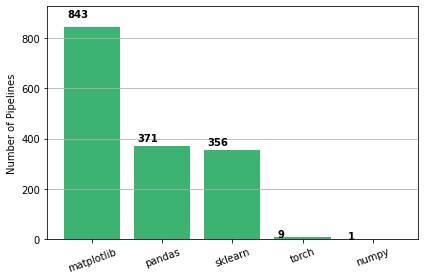

In [22]:
kglids.get_top_k_library_used(k=15)

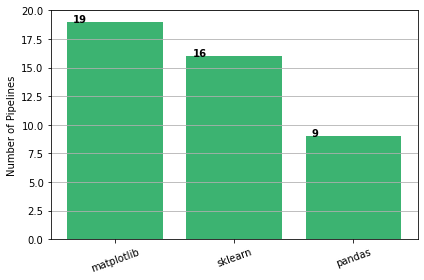

In [23]:
kglids.get_top_k_library_used(dataset='fedesoriano.hepatitis-c-dataset', k=10)

<b>14. Library discovery</b><br> 
tasks supported: classification, regression, visualization and clustering

In [24]:
kglids.get_top_used_libraries(k = 5, task = 'classification')

Single library was found for classification: 
sklearn


,Library,Module,Pipeline,Dataset
0,sklearn,RandomForestClassifier,Classification of Patients EDA,uciml.biomechanical-features-of-orthopedic-pat...
1,sklearn,RandomForestClassifier,Gender Classification-II,hb20007.gender-classification
2,sklearn,RandomForestClassifier,Gender Classification : 95% accuracy,hb20007.gender-classification
3,sklearn,GradientBoostingClassifier,gender_classification,hb20007.gender-classification
4,sklearn,RandomForestClassifier,gender_classification,hb20007.gender-classification
...,...,...,...,...
136,sklearn,GradientBoostingClassifier,Stellar Classification Dataset - SDSS17,fedesoriano.stellar-classification-dataset-sdss17
137,sklearn,RandomForestClassifier,Stellar Classification - SDSS17 (4 ML Models),fedesoriano.stellar-classification-dataset-sdss17
138,sklearn,RandomForestClassifier,"Twitter Sentiment Analysis: NLP, SMOTE",arkhoshghalb.twitter-sentiment-analysis-hatred...
139,sklearn,RandomForestClassifier,Stellar Classification - 98.4% Acc 100% AUC,fedesoriano.stellar-classification-dataset-sdss17


In [25]:
kglids.get_top_used_libraries(k = 5, task = 'regression')

Single library was found for regression: 
sklearn


,Library,Module,Pipeline,Dataset
0,sklearn,LogisticRegression,Classification of Patients EDA,uciml.biomechanical-features-of-orthopedic-pat...
1,sklearn,LogisticRegression,gender_classification,hb20007.gender-classification
2,sklearn,LogisticRegression,Logistic Regression and Predicting Genders,hb20007.gender-classification
3,sklearn,LogisticRegression,"Gender Classification - LR, DT, RF, SVM and KNN",hb20007.gender-classification
4,sklearn,LogisticRegression,Human Resources : who is going to quit ?,rhuebner.human-resources-data-set
...,...,...,...,...
72,sklearn,LogisticRegression,Stellar Classification | Comparing 6 algorithms,fedesoriano.stellar-classification-dataset-sdss17
73,sklearn,LogisticRegression,Red Wine Quality Classification Analysis + EDA,uciml.red-wine-quality-cortez-et-al-2009
74,sklearn,LogisticRegression,Advanced Analysis with Resampling 🍷🍇🍀,uciml.red-wine-quality-cortez-et-al-2009
75,sklearn,LogisticRegression,Twitter Sentiment Analysis,arkhoshghalb.twitter-sentiment-analysis-hatred...


In [26]:
kglids.get_top_used_libraries(k = 5, task = 'visualization')

Maximum 2 libraries were found for visualization: 
matplotlib, seaborn


,Library,Module,Pipeline,Dataset
0,matplotlib,pyplot,What's this? Chai and DataScience?,rohanrao.chai-time-data-science
1,matplotlib,pyplot,Food demand full EDA,kannanaikkal.food-demand-forecasting
2,matplotlib,pyplot,Food Demand Forecasting,kannanaikkal.food-demand-forecasting
3,matplotlib,pyplot,food demand prediction,kannanaikkal.food-demand-forecasting
4,matplotlib,pyplot,Food-demand-forecasting 🧁🍟🍱🍺🍨,kannanaikkal.food-demand-forecasting
...,...,...,...,...
602,seaborn,seaborn,Finding dependent attributes using only EDA,becksddf.churn-in-telecoms-dataset
603,seaborn,seaborn,Lab 1. EDA. Lazor,becksddf.churn-in-telecoms-dataset
604,seaborn,seaborn,Steller-Classification with 97% Accuracy,fedesoriano.stellar-classification-dataset-sdss17
605,seaborn,seaborn,Predict Covid 19 With EDA And ML In Python,anandhuh.covid19-india-statewise-vaccine-data


In [27]:
kglids.get_top_used_libraries(k = 5, task = 'clustering')

No library found for clustering


<b>15. Pipeline Discovery</b> 


In [28]:
pipelines_info = kglids.get_pipelines_calling_libraries(['pandas.read_csv', 
                                                         'sklearn.linear_model.LogisticRegression', 
                                                         'sklearn.metrics.accuracy_score'])
pipelines_info

,Pipeline,Dataset,Author,Score,Number_of_votes
0,Stellar Classification and Supervised Learning⭐,fedesoriano.stellar-classification-dataset-sdss17,Waleed Faheem,0.988913,31
1,Red Wine Quality Classification,uciml.red-wine-quality-cortez-et-al-2009,Nitesh Yadav,0.981929,74
2,Red Wine Quality | EDA | Models,uciml.red-wine-quality-cortez-et-al-2009,Arsh Anwar,0.978748,65
3,Classification_of_temp_reading_using_LR_and,atulanandjha.temperature-readings-iot-devices,Bhushan Rajput,0.978135,5
4,Mushroom Classes: with 100% accuracy,uciml.mushroom-classification,Ahmed Gado,0.963857,41
5,Modeling-FeatureSelection-SMOTE-EDA-XAI-ModelTune,becksddf.churn-in-telecoms-dataset,Ali Galip Sekeroglu,0.960298,12
6,Feature Engineering + Classifying heroes as hu...,claudiodavi.superhero-set,Pere Manresa,0.942909,2
7,All ML Algos,uciml.mushroom-classification,Izam Mohammed,0.922462,34
8,💫Stellar Classification : EDA + ML🌳,fedesoriano.stellar-classification-dataset-sdss17,ANMOL BAJPAI,0.918764,13
9,Nueral Network Regression VS Sklearn Algorithms,alexteboul.heart-disease-health-indicators-dat...,Ahmed_Helal,0.893106,6


<b>16. Search deep learning pipelines</b> 

In [29]:
kglids.get_pipelines_for_deep_learning()

,Pipeline,Dataset,Author,Written_on,Score,Number_of_votes
0,[Inference] Birdsong Baseline: ResNeSt50-fast,shonenkov.birdcall-check,Tawara,2020-07-15 19:41:11,0.980886,183
1,Classification_of_temp_reading_using_LR_and,atulanandjha.temperature-readings-iot-devices,Bhushan Rajput,2019-12-30 19:37:51,0.978135,5
2,K-Nearest Neighbors (KNN) Classification (75.2...,uciml.biomechanical-features-of-orthopedic-pat...,Furkan Gulsen,2020-05-15 00:20:26,0.921151,28
3,Birdcall ResNestSED Effnet b0 EMA All th04,shonenkov.birdcall-check,Hidehisa Arai,2020-09-15 00:53:38,0.909425,57
4,Biomechanical features - 20 popular models,uciml.biomechanical-features-of-orthopedic-pat...,Vitalii Mokin,2020-10-11 19:52:55,0.898329,64
5,Epidemic Model COVID-19🦠 India + Visualizations,danofer.india-census,Adarsh C,2020-10-22 05:34:49,0.897995,77
6,〽️|3️⃣Ways to Deal with Time Series Forecasting,nicholasjhana.energy-consumption-generation-pr...,M Faarisul Ilmi,2022-12-28 13:46:20,0.894920,88
7,🎯 Twitter sentiment analysis: Hatred speech,arkhoshghalb.twitter-sentiment-analysis-hatred...,Mustanger,2022-12-01 13:03:09,0.866724,96
8,Trends in 2020 with Advice from Top Kagglers,rohanrao.chai-time-data-science,Leonie,2020-12-20 21:06:57,0.833010,81
9,Cell Phones Reviews Sentiment Analysis - Title,grikomsn.amazon-cell-phones-reviews,Gaurav Dutta,2021-09-03 07:50:20,0.814392,4


<b>17. Search for possible transformations</b> 

In [30]:
kglids.recommend_transformations()

,Transformation,Pipeline,Table,Dataset
0,sklearn.preprocessing.StandardScaler,Starter: India - Trade Data 75aadc10-1,2018-2010_import.csv,lakshyaag.india-trade-data
1,sklearn.preprocessing.StandardScaler,Starter: India - Trade Data 75aadc10-1,2018-2010_export.csv,lakshyaag.india-trade-data
2,sklearn.preprocessing.LabelEncoder,Biomechanical features - 20 popular models,column_2C_weka.csv,uciml.biomechanical-features-of-orthopedic-pat...
3,sklearn.preprocessing.StandardScaler,Alti Özellige Göre Hastalarin Siniflandirilmasi,column_2C_weka.csv,uciml.biomechanical-features-of-orthopedic-pat...
4,sklearn.preprocessing.StandardScaler,Alti Özellige Göre Hastalarin Siniflandirilmasi,column_3C_weka.csv,uciml.biomechanical-features-of-orthopedic-pat...
...,...,...,...,...
588,sklearn.preprocessing.OneHotEncoder,deep_learning_model_for_horse_racing,races.csv,gdaley.hkracing
589,sklearn.preprocessing.StandardScaler,deep_learning_model_for_horse_racing,runs.csv,gdaley.hkracing
590,sklearn.preprocessing.StandardScaler,deep_learning_model_for_horse_racing,races.csv,gdaley.hkracing
591,sklearn.preprocessing.LabelEncoder,naive_bayes_classifier_for_horse_racing,runs.csv,gdaley.hkracing


<b> 18. Visualize pipeline usage by tasks</b>

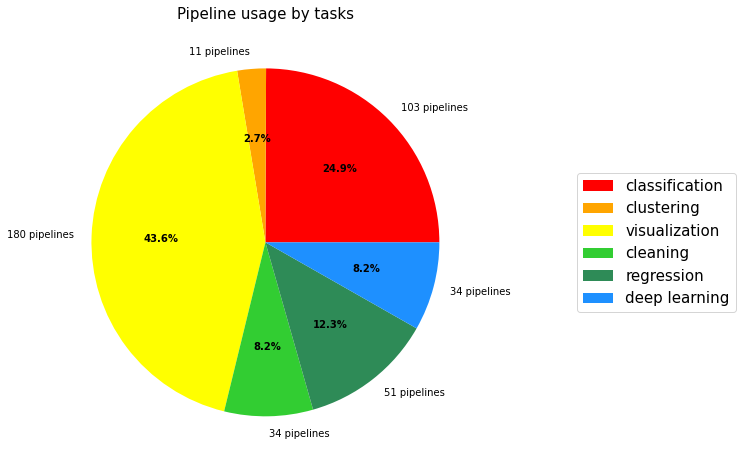

In [31]:
kglids.show_pipeline_usage_by_task()

<b> 19. Most used ML models by tasks</b>

Maximum 3 classifier(s) were found
Showing top-3 classifiers


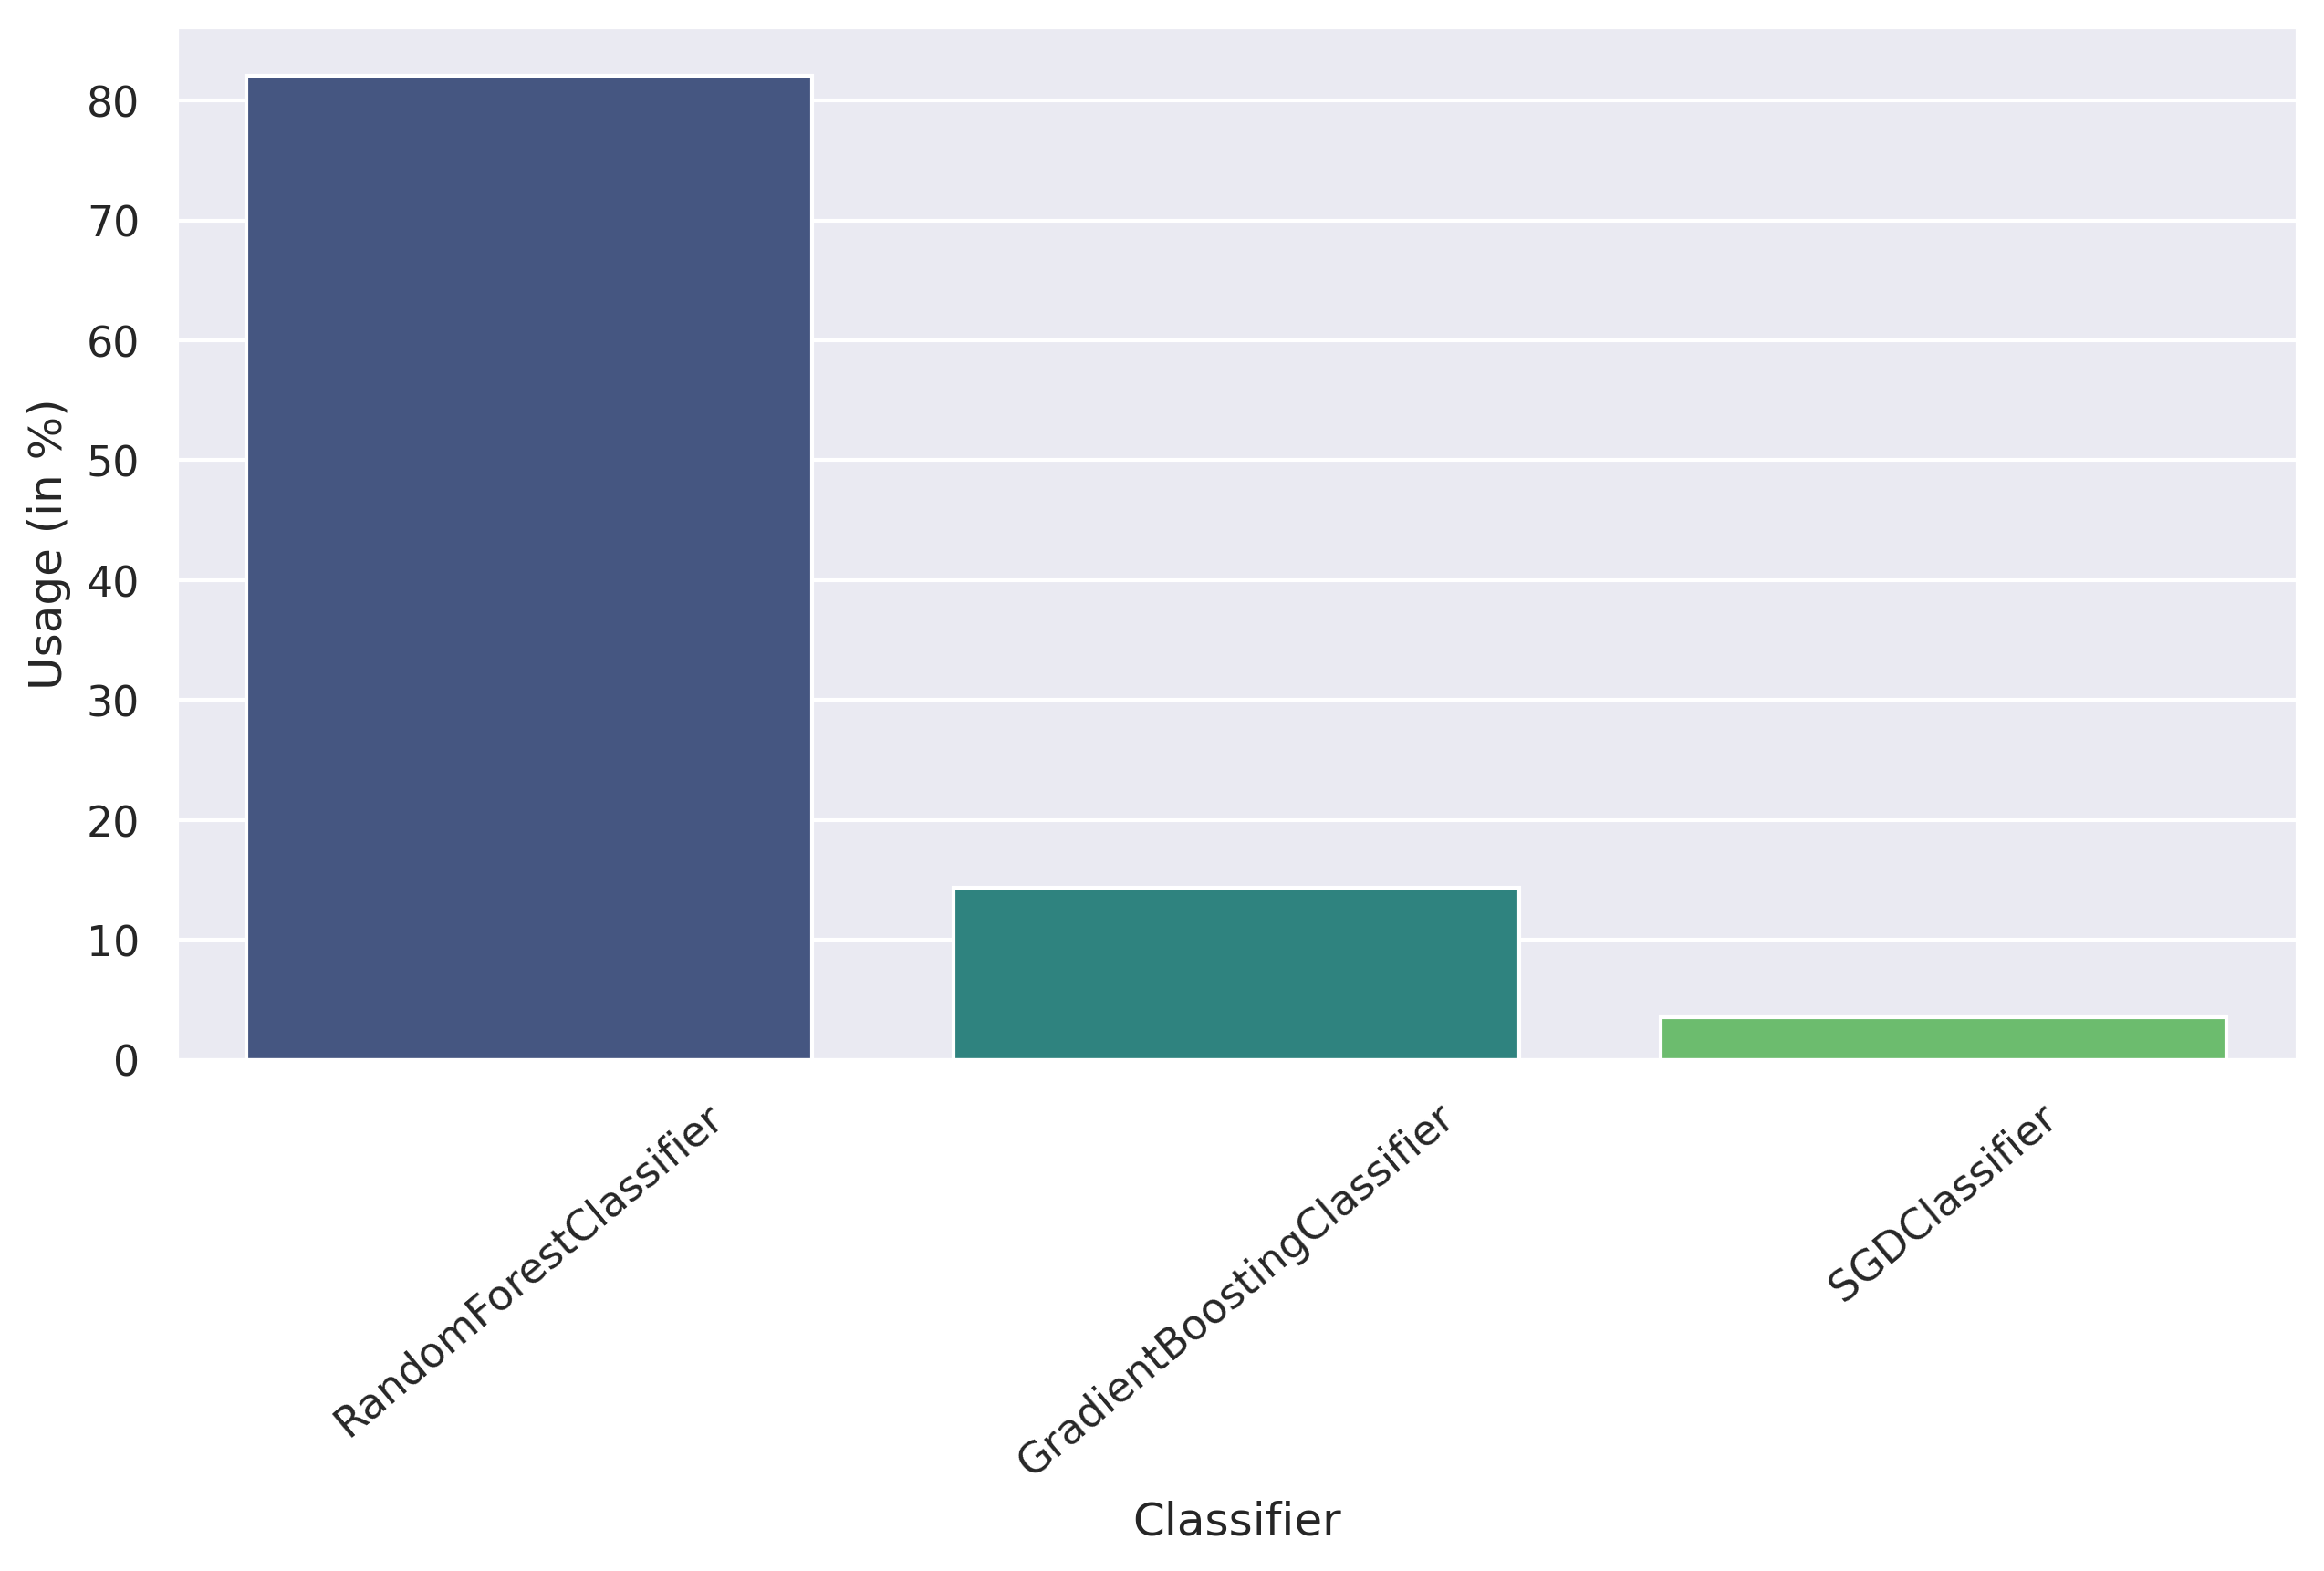

In [32]:
kglids.show_top_k_models_by_task(k=10, task='classification')

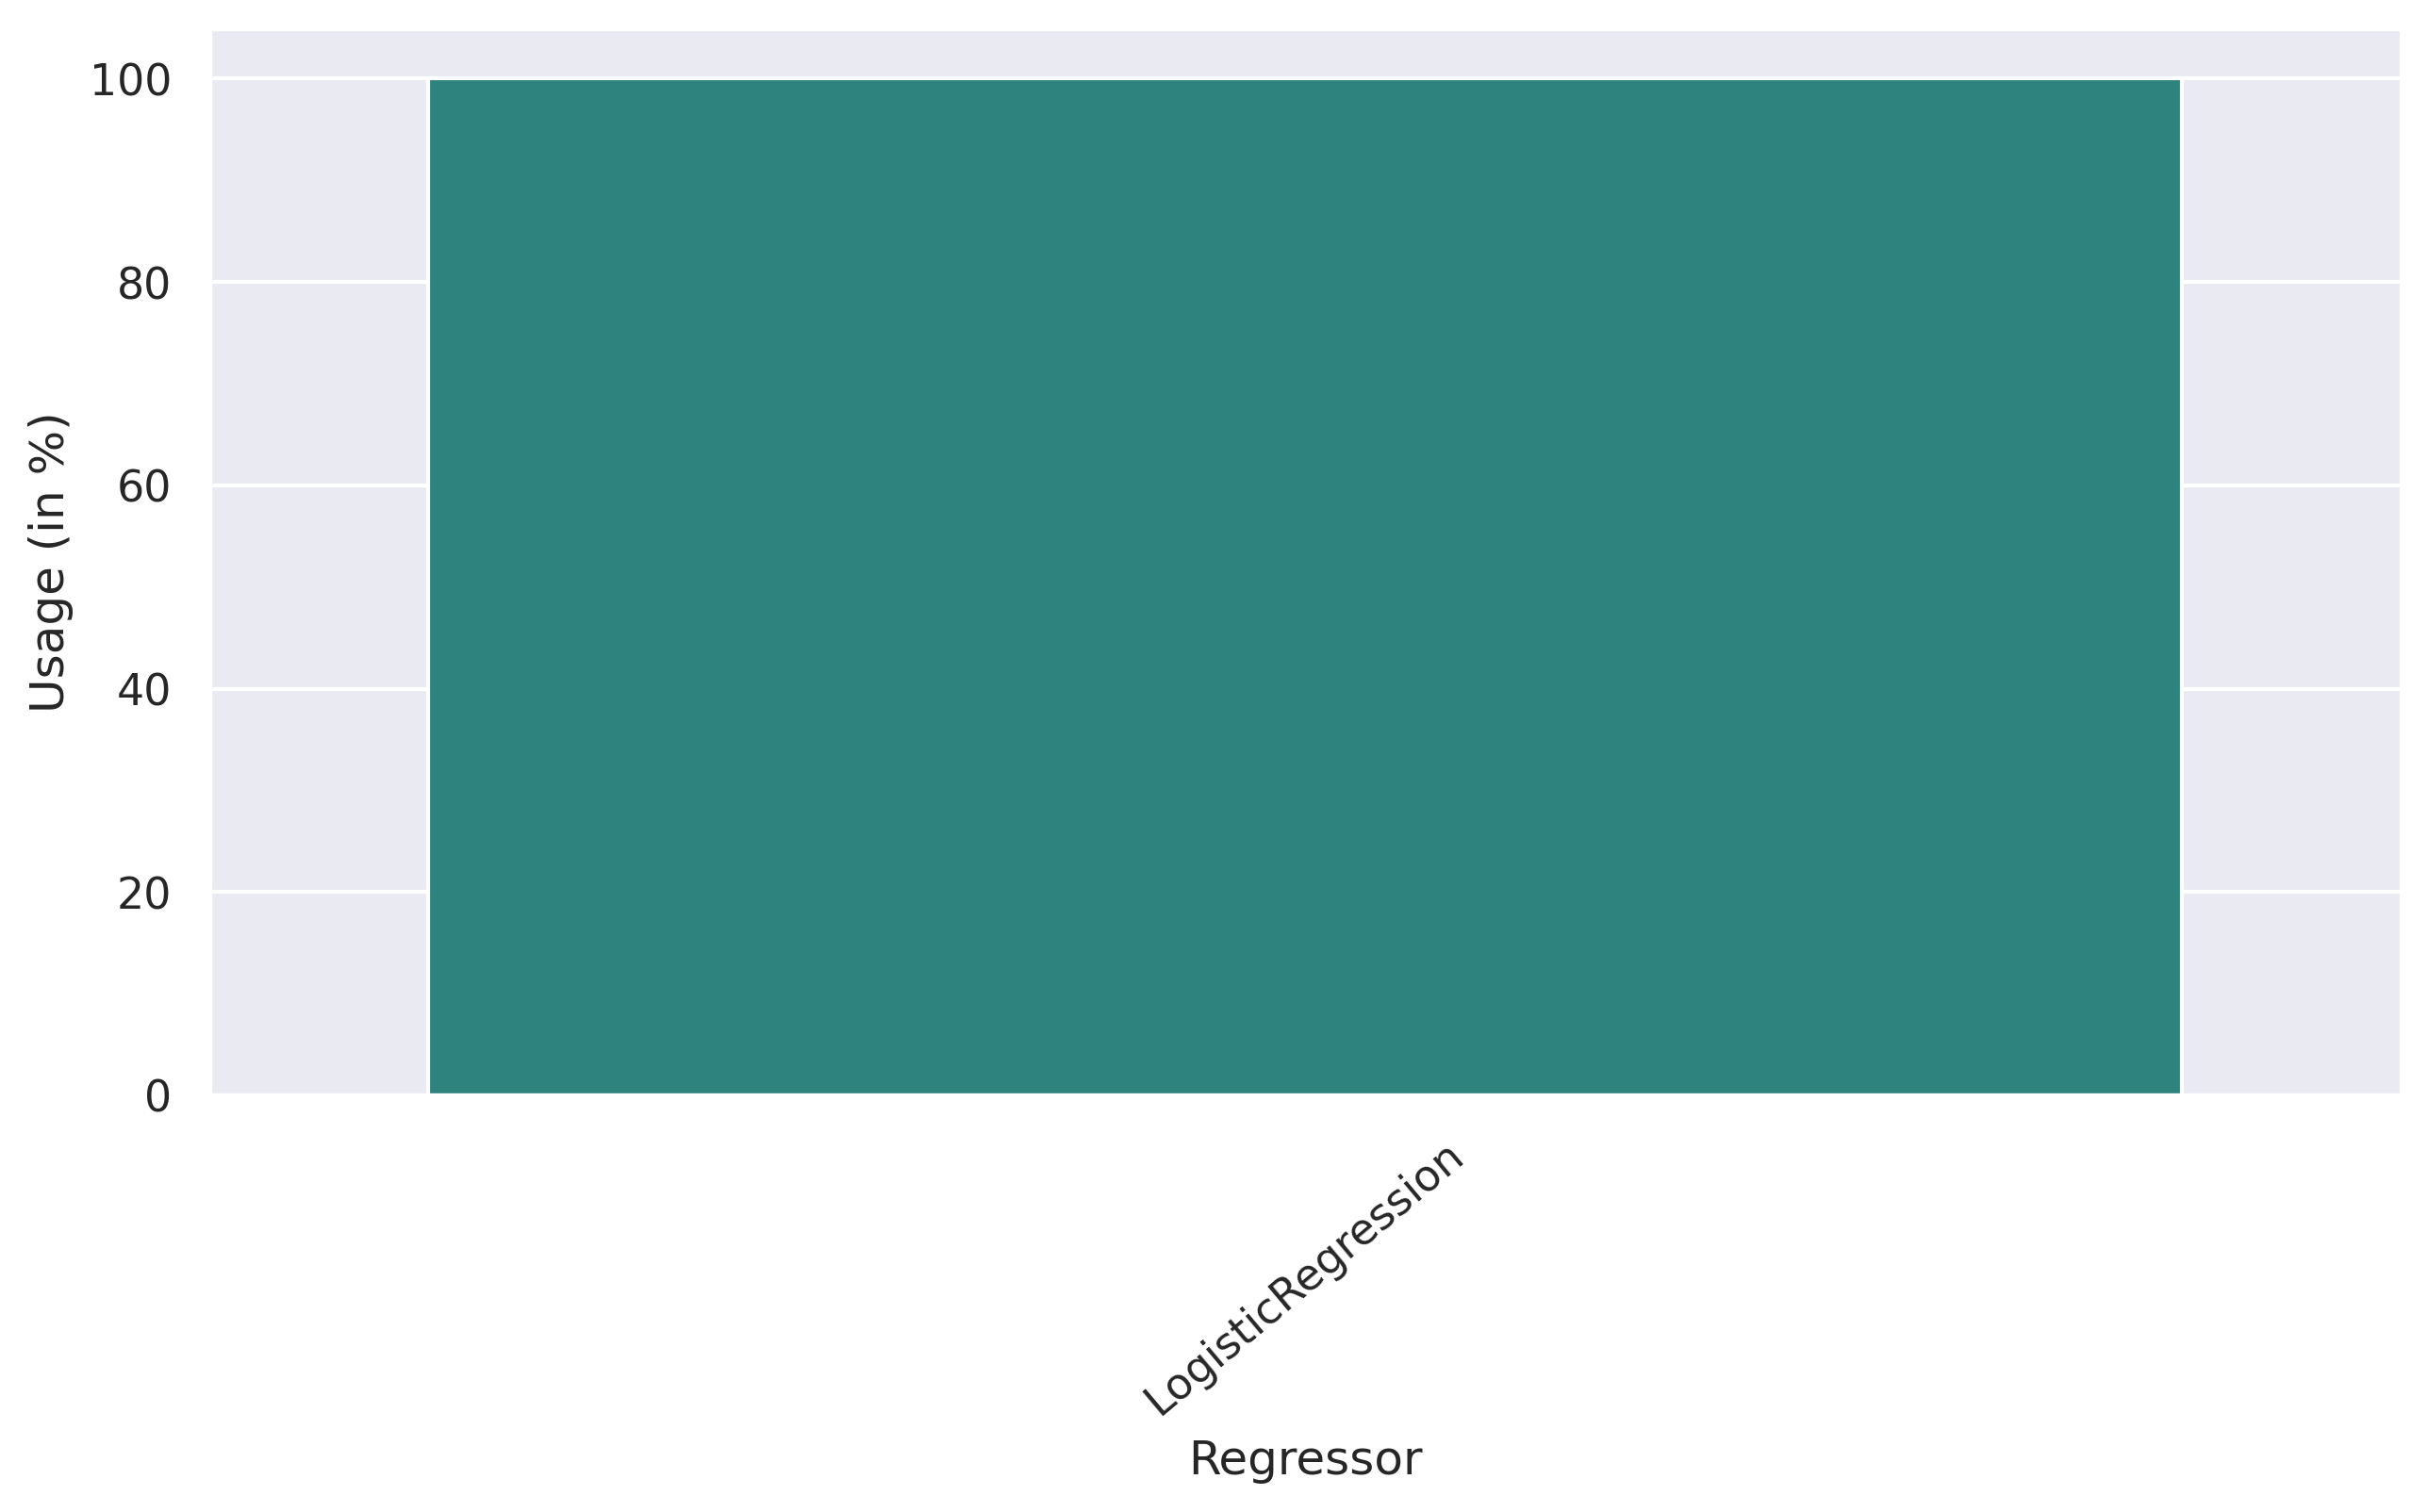

In [34]:
kglids.show_top_k_models_by_task(k=1, task='regression')